# **Task 1 - Exploration of customer purchasing behavior**

In [18]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.eda_analysis import *
from scripts.logger import setup_logger

# Logger

In [19]:
logger = setup_logger('eda_logger', '../logs/eda.log')

# Load the data

In [20]:
data_train = pd.read_csv('../data/train_cleaned.csv',low_memory=False, index_col=False)
data_test=pd.read_csv('../data/test_cleaned.csv', low_memory=False, index_col=False)

In [21]:
logger.info('Training, test, and store data loaded.')

# Properties of the Data

In [22]:
data_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [23]:
data_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [24]:
data_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422034e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706913e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [25]:
data_test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854361,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352748,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [26]:
data_train.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [27]:
data_test.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

**1.** Check for distribution in both training and test sets - are the **promotions distributed similarly** between these two groups?

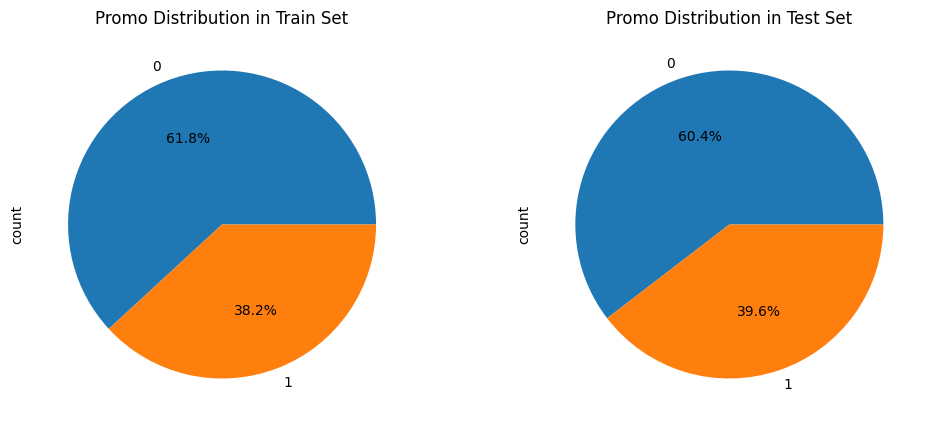

In [28]:
plot_promo_distribution(data_train, data_test)

**===>** From the diagrams, we can see the distribution of the "Promo" feature in both the training and test sets.

- In the **training set**, approximately **61.8%** of the data falls under the "Promo" value of 0 (no promotion), while **38.2%** falls under the "Promo" value of 1 (promotion).
- In the **test set**, approximately **60.4%** of the data is labeled as 0 (no promotion), and **39.6%** is labeled as 1 (promotion).

### Conclusion:
The promotion distributions in both the training and test sets are **quite similar**, with only minor differences in the proportions. The training set has slightly more data points without promotion (61.8% vs. 60.4%) and slightly fewer with promotion (38.2% vs. 39.6%). These differences are minimal and suggest that the promotional data is distributed fairly consistently between the two sets, which is important for ensuring that any model trained on this data will generalize well across both sets.

**2.** Check & compare **sales behavior** before, during, and after holidays

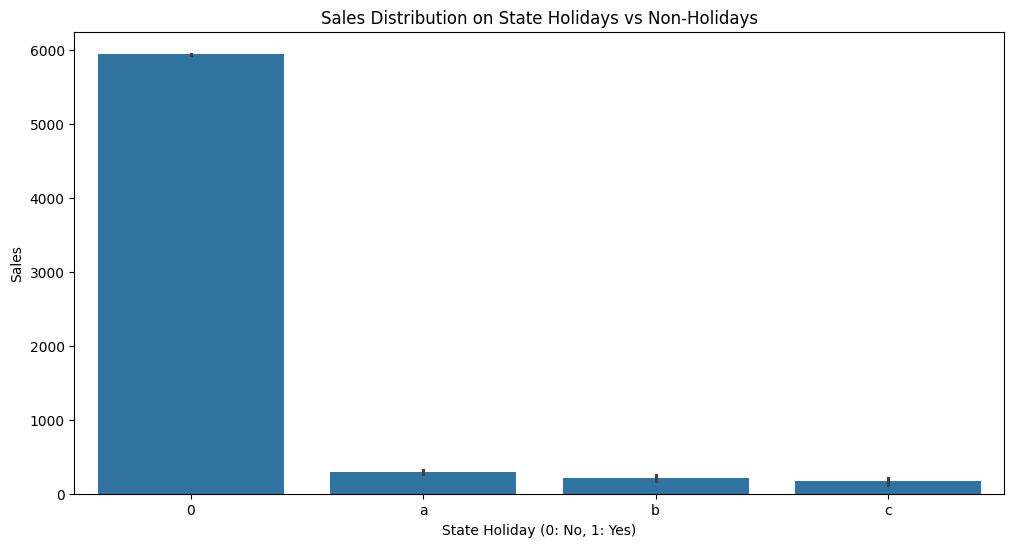

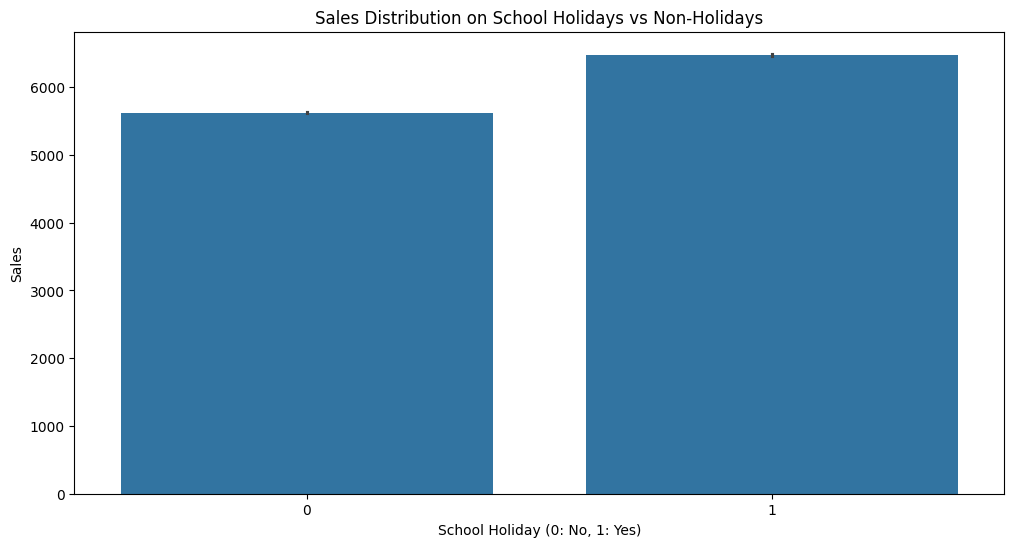

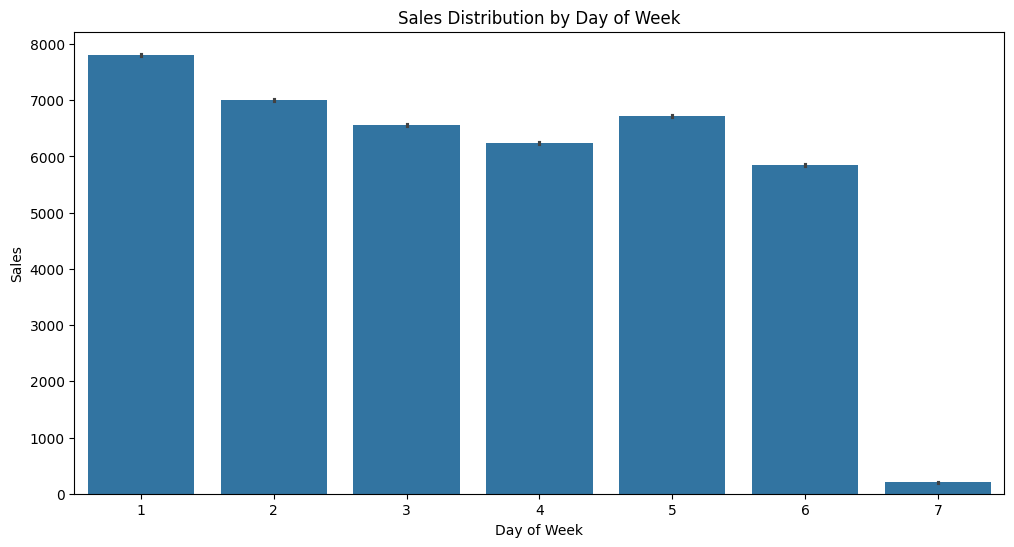

In [29]:
analyze_holiday_sales(data_train)

**===>** Based on the diagrams, here are some conclusions regarding **sales behavior before, during, and after holidays**:

1. **State Holidays:**
   - Sales are significantly higher on non-state holidays compared to state holidays. This suggests that most stores are likely closed or see reduced customer traffic during state holidays.

2. **School Holidays:**
   - Sales are relatively consistent regardless of school holidays, indicating that school closures do not significantly impact overall sales.

3. **Day of the Week:**
   - Sales peak at the beginning of the week (Monday) and gradually decrease towards the weekend, with a noticeable drop on Sundays. This pattern may reflect typical shopping behavior, where customers prefer shopping earlier in the week.

**3.** Find out any seasonal (Christmas, Easter, etc) purchase behaviors

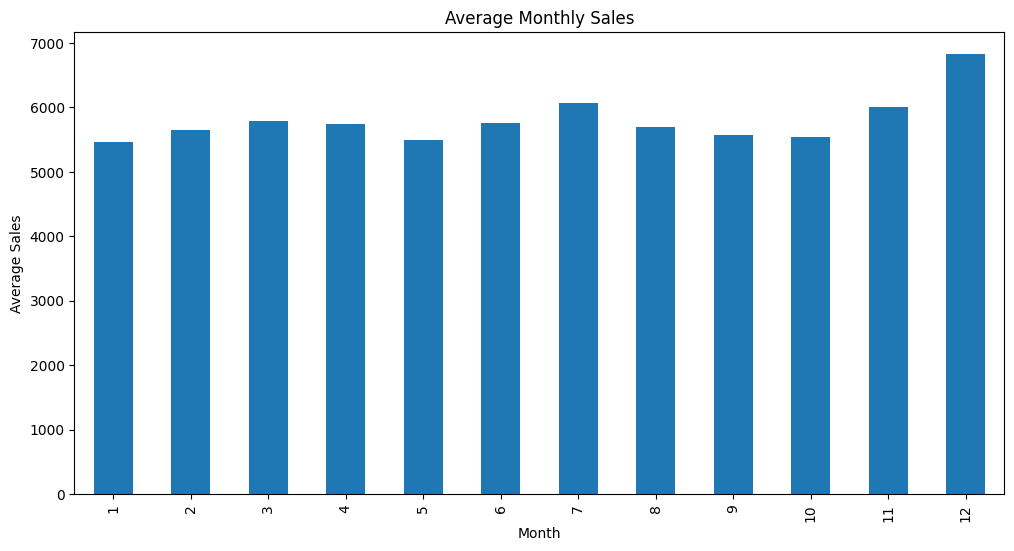

In [30]:
analyze_seasonal_sales(data_train)

**===>** Based on the diagram of average monthly sales, we can conclude the following about seasonal purchase behaviors:

1. **December Surge:**
   - There is a noticeable increase in sales during December, likely due to the Christmas season. This suggests a seasonal boost in consumer spending during this period.

2. **Consistent Sales:**
   - Sales remain relatively stable throughout the other months, with no dramatic peaks or troughs, indicating consistent purchasing behavior outside of major holiday seasons.

3. **Mid-Year Activity:**
   - There is a slight increase in sales around July, which might be attributed to summer promotions or other seasonal events.

These insights can help Rossmann Pharmaceuticals plan inventory and marketing strategies to capitalize on increased demand during the holiday season, particularly in December.

**4.** What can you say about the **correlation between sales and the number of customers**?

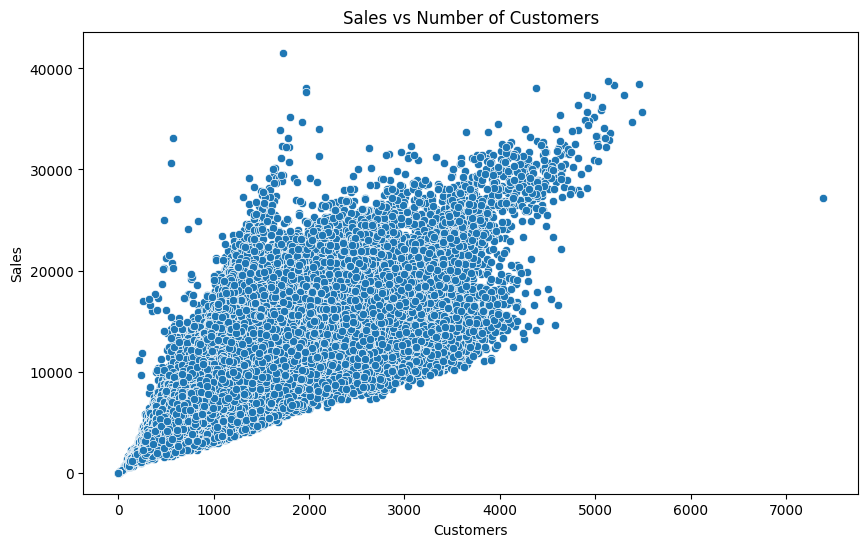

Correlation between Sales and Customers: 0.8947107733017032


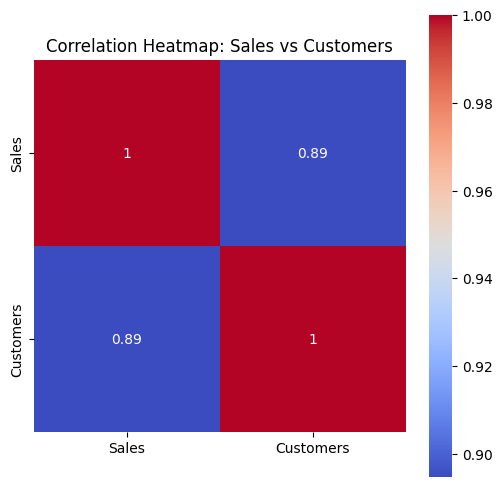

In [31]:
analyze_sales_customers_correlation(data_train)
logger.info("correlation between sales and number of customers")

**===>** The diagram illustrates a strong correlation between sales and the number of customers:

1. **High Correlation:**
   - The scatter plot shows a clear positive relationship between the number of customers and sales, indicating that more customers generally lead to higher sales.

2. **Correlation Coefficient:**
   - The correlation coefficient is approximately 0.89, suggesting a very strong positive correlation. This means that changes in the number of customers are closely associated with changes in sales.

3. **Consistent Pattern:**
   - The consistent upward trend in the scatter plot further supports the strong relationship between these two variables.

These insights highlight the importance of customer footfall in driving sales, suggesting that strategies to increase customer visits could be effective in boosting sales.

**5.** How does **promo affect sales**? Are the promos attracting more customers? How does it affect already existing customers?

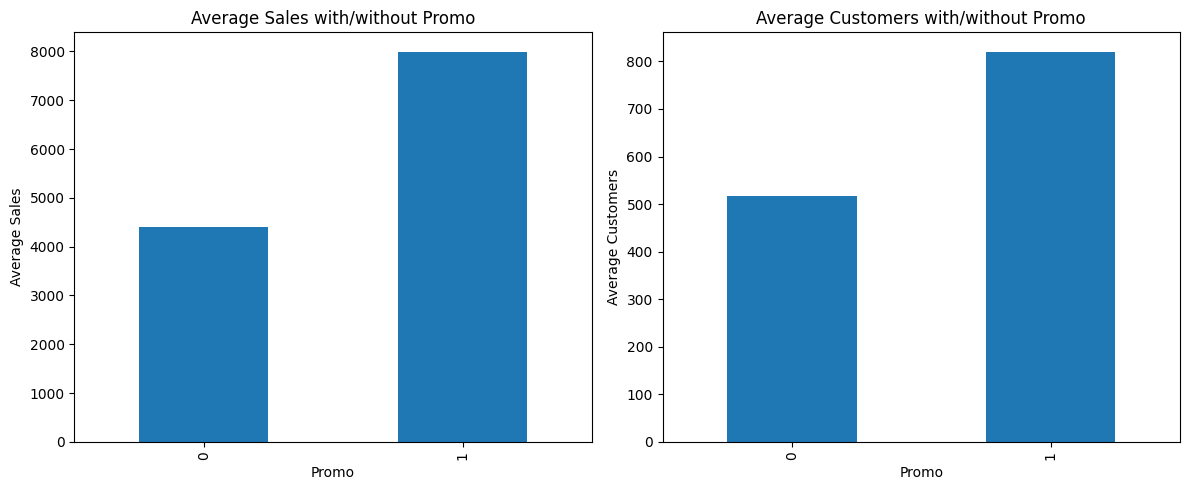

In [32]:
analyze_promo_effect(data_train)

**===>** The diagrams provide insights into the impact of promotions on sales and customer numbers:

1. **Effect on Sales:**
   - Promotions significantly increase average sales. Stores with promotions see much higher sales compared to those without.

2. **Attracting Customers:**
   - Promotions also attract more customers. The average number of customers is higher when promotions are active.

3. **Impact on Existing Customers:**
   - The increase in both sales and customer numbers suggests that promotions are effective in bringing in additional customers, potentially increasing the purchasing frequency of existing ones as well.

Overall, promotions appear to be a successful strategy for boosting both customer footfall and sales.

**6.** Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

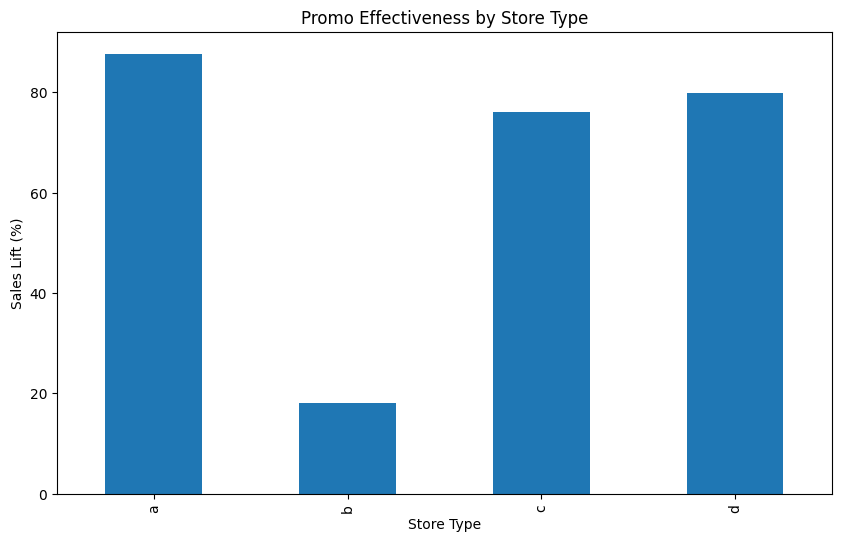

Top 10 stores where promos are most effective:
Store
198     2.258195
607     1.889831
543     1.759064
575     1.737234
271     1.620440
693     1.611931
96      1.575477
1108    1.567058
552     1.562815
635     1.559672
dtype: float64


In [33]:
enhance_promo_analysis(data_train)

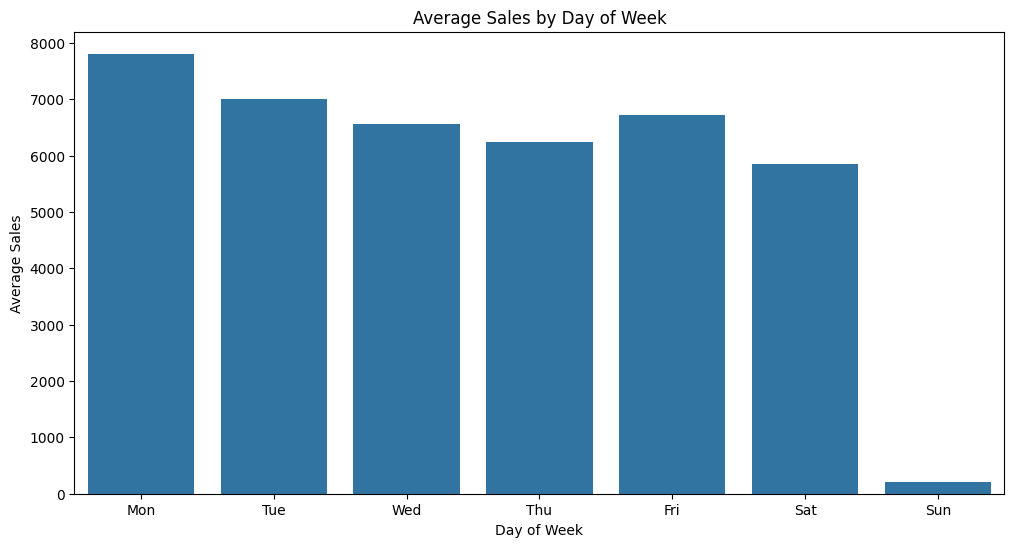

Proportion of stores open by day of week:
DayOfWeek
1    0.950459
2    0.988309
3    0.974400
4    0.923199
5    0.950598
6    0.995357
7    0.024826
Name: Open, dtype: float64

Average sales for open stores by day of week:
DayOfWeek
1    8216.073074
2    7088.113656
3    6728.122978
4    6767.310159
5    7072.677012
6    5874.840238
7    8224.723908
Name: Sales, dtype: float64


In [34]:
def analyze_store_hours(data):
    # Group by DayOfWeek and calculate average sales
    daily_sales = data.groupby('DayOfWeek')['Sales'].mean().reset_index()
    
    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='DayOfWeek', y='Sales', data=daily_sales)
    plt.title('Average Sales by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Average Sales')
    plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.show()

    # Analyze open/closed patterns
    open_stores = data.groupby('DayOfWeek')['Open'].mean()
    print("Proportion of stores open by day of week:")
    print(open_stores)

    # Analyze sales for open stores
    open_sales = data[data['Open'] == 1].groupby('DayOfWeek')['Sales'].mean()
    print("\nAverage sales for open stores by day of week:")
    print(open_sales)

# Run the analysis
analyze_store_hours(data_train)

**===>** From the diagram, here are conclusions about promo effectiveness:

1. **Targeted Day and Store Type Strategy:**
   - Promotions are most effective in store types **a**, **c**, and **d**, with significant sales lifts. To maximize impact, focus promos on these store types, especially on days with lower sales, like mid-week and weekends.
   - Adjusting promotional strategies to target underperforming days can help boost customer engagement and balance sales throughout the week.

These insights suggest a combined approach of targeting both specific store types and days to optimize promotional effectiveness.

**7.** Trends of customer behavior during store opening and closing times

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Open', y='Sales', data=data_train)
plt.title('Customer Behavior During Store Opening and Closing Times')
plt.xlabel('Open')
plt.ylabel('Sales')
plt.show()